In [304]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, KFold

In [305]:
df = pd.read_csv("/Users/salmonm/Downloads/premier-player-23-24.csv")

In [306]:
df = df.dropna(subset=['Age', 'Gls', 'Ast', 'xG', 'npxG', 'xAG', 'PrgC', 'PrgR', 'PrgP'])

In [307]:
print(df.head())
print(df.info())

           Player   Nation    Pos   Age  MP  Starts     Min   90s   Gls  Ast  \
0           Rodri   es ESP     MF  27.0  34      34  2931.0  32.6   8.0  9.0   
1      Phil Foden  eng ENG  FW,MF  23.0  35      33  2857.0  31.7  19.0  8.0   
2         Ederson   br BRA     GK  29.0  33      33  2785.0  30.9   0.0  0.0   
3  Juli√°n √Ålvarez   ar ARG  MF,FW  23.0  36      31  2647.0  29.4  11.0  8.0   
4     Kyle Walker  eng ENG     DF  33.0  32      30  2767.0  30.7   0.0  4.0   

   ...  Ast_90  G+A_90  G-PK_90  G+A-PK_90  xG_90  xAG_90  xG+xAG_90  npxG_90  \
0  ...    0.28    0.52     0.25       0.52   0.12    0.12       0.24     0.12   
1  ...    0.25    0.85     0.60       0.85   0.33    0.26       0.59     0.33   
2  ...    0.00    0.00     0.00       0.00   0.00    0.00       0.00     0.00   
3  ...    0.27    0.65     0.31       0.58   0.44    0.22       0.66     0.39   
4  ...    0.13    0.13     0.00       0.13   0.01    0.09       0.10     0.01   

   npxG+xAG_90             Tea

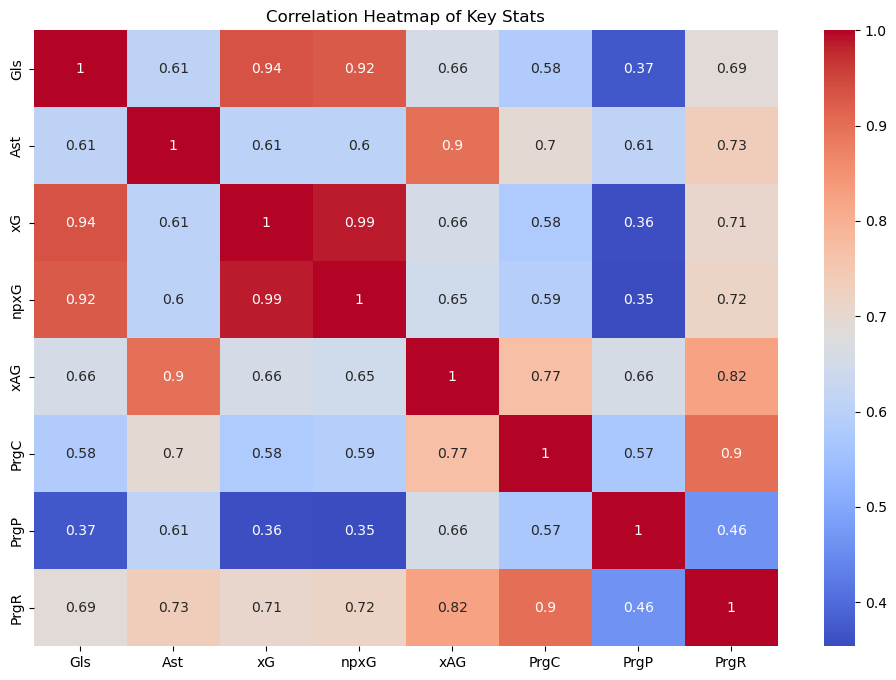

In [308]:
plt.figure(figsize=(12, 8))
sns.heatmap(df[['Gls', 'Ast', 'xG', 'npxG', 'xAG', 'PrgC', 'PrgP', 'PrgR']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Key Stats')
plt.show()

In [309]:
features = df[['PrgC', 'PrgR', 'PrgP']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [310]:
kmeans = KMeans(n_clusters=2, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

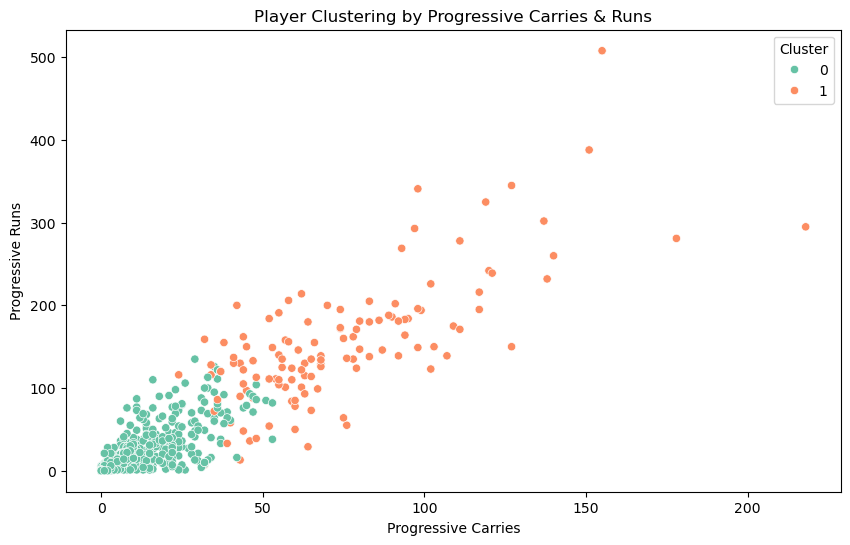

In [311]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PrgC', y='PrgR', hue='Cluster', palette='Set2')
plt.title('Player Clustering by Progressive Carries & Runs')
plt.xlabel('Progressive Carries')
plt.ylabel('Progressive Runs')
plt.show()

In [312]:
# ‡∏Å‡∏£‡∏≠‡∏á‡πÅ‡∏ñ‡∏ß‡∏ó‡∏µ‡πà‡∏°‡∏µ‡∏Å‡∏≤‡∏£‡∏•‡∏á‡πÄ‡∏•‡πà‡∏ô‡∏à‡∏£‡∏¥‡∏á (‡∏´‡∏•‡∏µ‡∏Å‡πÄ‡∏•‡∏µ‡πà‡∏¢‡∏á 0 ‡∏ô‡∏≤‡∏ó‡∏µ)
df = df[df['90s'] > 0]

# ‡∏™‡∏£‡πâ‡∏≤‡∏á‡∏Ñ‡πà‡∏≤‡∏õ‡∏£‡∏∞‡∏ï‡∏π‡∏ï‡πà‡∏≠ 90 ‡∏ô‡∏≤‡∏ó‡∏µ
df['GoalsPer90'] = df['Gls'] / df['90s']

In [313]:
X = df[['xG', 'xAG', 'npxG', 'PrgC', 'PrgP', 'PrgR']]
y = df['GoalsPer90']

# ‡πÄ‡∏ú‡∏∑‡πà‡∏≠‡∏°‡∏µ NaN ‡∏à‡∏≤‡∏Å‡∏Ñ‡∏≠‡∏•‡∏±‡∏°‡∏ô‡πå‡∏≠‡∏∑‡πà‡∏ô ‡πÉ‡∏´‡πâ dropna ‡∏≠‡∏µ‡∏Å‡∏£‡∏≠‡∏ö
X = X[~y.isna()]
y = y.dropna()

In [314]:
df['GoalsPer90'] = df['Gls'] / df['90s']
X = df[['xG', 'xAG', 'npxG', 'PrgC', 'PrgP', 'PrgR']]
y = df['GoalsPer90']

In [315]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [316]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [317]:
print("R2 Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

R2 Score: 0.4155648661011142
MSE: 0.02068227469978009


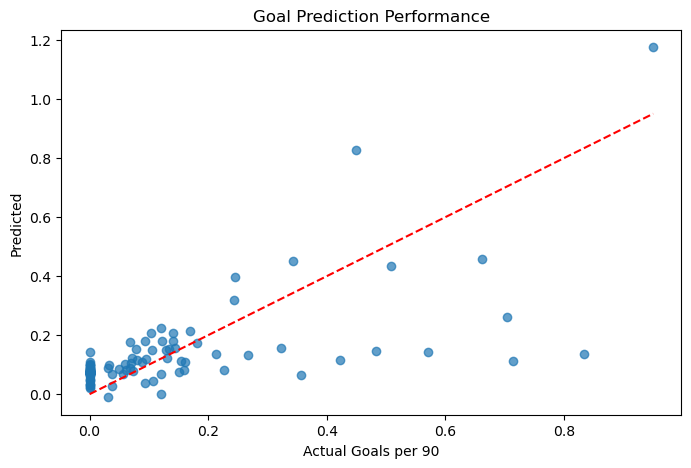

In [318]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Goals per 90")
plt.ylabel("Predicted")
plt.title("Goal Prediction Performance")
plt.plot([0, max(y_test)], [0, max(y_test)], 'r--')
plt.show()

In [319]:
print(y.isna().sum())

0


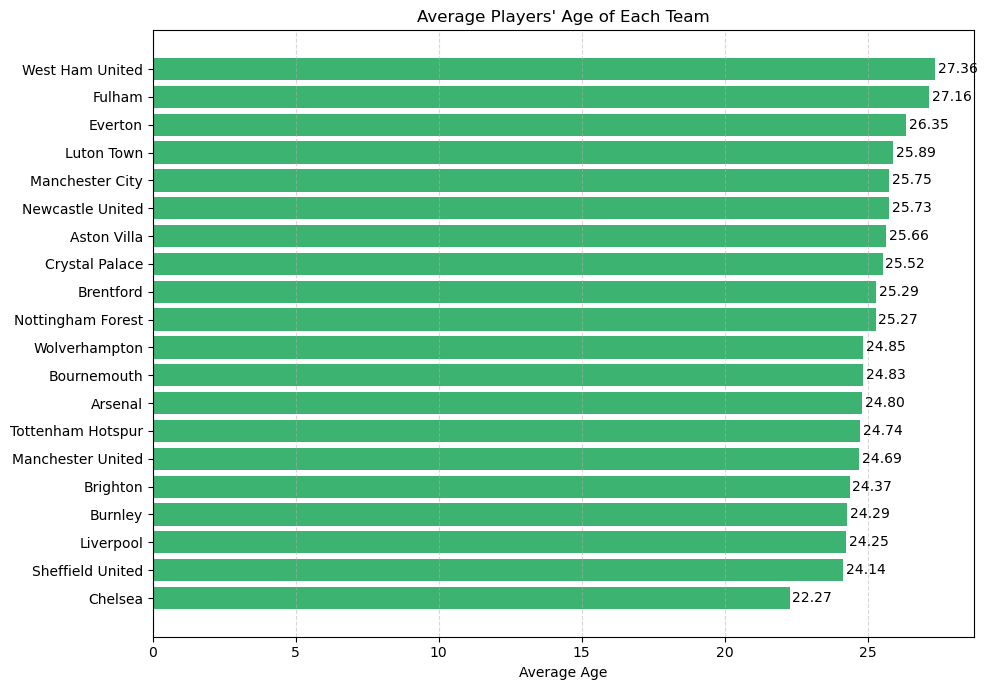

In [320]:
# ‡∏Ñ‡∏≥‡∏ô‡∏ß‡∏ì‡∏≠‡∏≤‡∏¢‡∏∏‡πÄ‡∏â‡∏•‡∏µ‡πà‡∏¢‡∏Ç‡∏≠‡∏á‡πÅ‡∏ï‡πà‡∏•‡∏∞‡∏ó‡∏µ‡∏°
avg_age = df.groupby('Team')['Age'].mean().sort_values(ascending=False)

# ‡∏ß‡∏≤‡∏î‡∏Å‡∏£‡∏≤‡∏ü‡πÅ‡∏ó‡πà‡∏á‡πÅ‡∏ô‡∏ß‡∏ô‡∏≠‡∏ô
plt.figure(figsize=(10, 7))
bars = plt.barh(avg_age.index, avg_age.values, color='mediumseagreen')

# ‡πÉ‡∏™‡πà‡πÄ‡∏•‡∏Ç‡∏≠‡∏≤‡∏¢‡∏∏‡∏î‡πâ‡∏≤‡∏ô‡∏´‡∏•‡∏±‡∏á‡πÅ‡∏ó‡πà‡∏á
for bar, age in zip(bars, avg_age.values):
    plt.text(age + 0.1,            # ‡∏ï‡∏≥‡πÅ‡∏´‡∏ô‡πà‡∏á x (‡∏ä‡∏¥‡∏î‡∏õ‡∏•‡∏≤‡∏¢‡πÅ‡∏ó‡πà‡∏á)
             bar.get_y() + bar.get_height() / 2,  # ‡∏ï‡∏≥‡πÅ‡∏´‡∏ô‡πà‡∏á y (‡∏ï‡∏£‡∏á‡∏Å‡∏•‡∏≤‡∏á‡πÅ‡∏ó‡πà‡∏á)
             f'{age:.2f}',         # ‡∏ï‡∏±‡∏ß‡πÄ‡∏•‡∏Ç‡πÅ‡∏™‡∏î‡∏á‡πÄ‡∏õ‡πá‡∏ô‡∏ó‡∏®‡∏ô‡∏¥‡∏¢‡∏° 2 ‡∏ï‡∏≥‡πÅ‡∏´‡∏ô‡πà‡∏á
             va='center')

plt.xlabel('Average Age')
plt.title("Average Players' Age of Each Team")
plt.gca().invert_yaxis()  # ‡πÅ‡∏™‡∏î‡∏á‡∏ó‡∏µ‡∏°‡∏ó‡∏µ‡πà‡∏≠‡∏≤‡∏¢‡∏∏‡∏™‡∏π‡∏á‡∏™‡∏∏‡∏î‡πÑ‡∏ß‡πâ‡∏î‡πâ‡∏≤‡∏ô‡∏ö‡∏ô
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

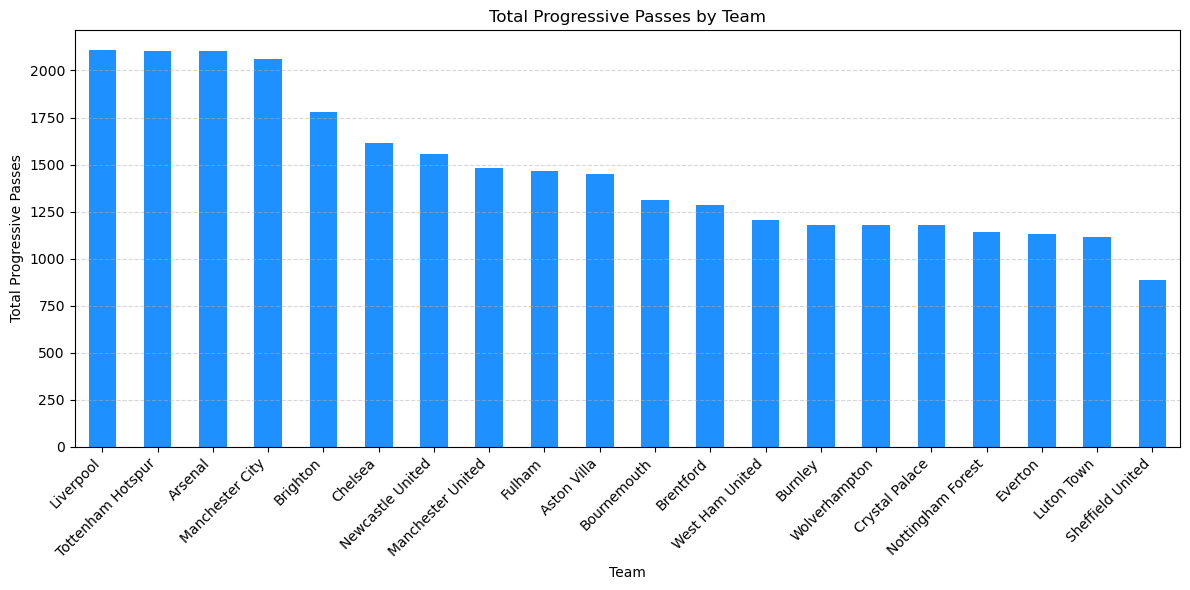

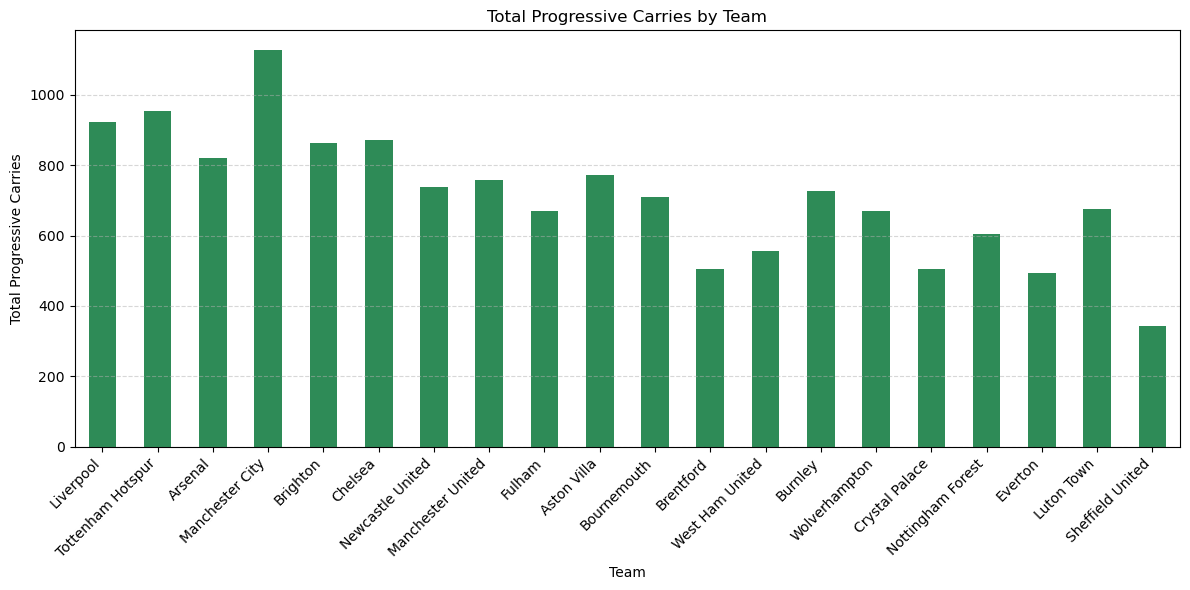

In [321]:
# ‡∏£‡∏ß‡∏°‡∏Ñ‡πà‡∏≤‡∏™‡∏ñ‡∏¥‡∏ï‡∏¥‡∏Å‡∏≤‡∏£‡∏™‡πà‡∏á‡∏ö‡∏≠‡∏•‡πÄ‡∏ä‡∏¥‡∏á‡∏£‡∏∏‡∏Å‡∏ï‡πà‡∏≠‡∏ó‡∏µ‡∏°
pass_stats = df.groupby('Team')[['PrgP', 'PrgC']].sum().sort_values(by='PrgP', ascending=False)

# ‡∏ß‡∏≤‡∏î‡∏Å‡∏£‡∏≤‡∏ü‡πÄ‡∏õ‡∏£‡∏µ‡∏¢‡∏ö‡πÄ‡∏ó‡∏µ‡∏¢‡∏ö
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
pass_stats['PrgP'].plot(kind='bar', color='dodgerblue', label='Progressive Passes')
plt.ylabel('Total Progressive Passes')
plt.title('Total Progressive Passes by Team')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
pass_stats['PrgC'].plot(kind='bar', color='seagreen', label='Progressive Carries')
plt.ylabel('Total Progressive Carries')
plt.title('Total Progressive Carries by Team')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [322]:
# ‡∏Å‡∏£‡∏≠‡∏á‡πÄ‡∏â‡∏û‡∏≤‡∏∞‡∏ú‡∏π‡πâ‡πÄ‡∏•‡πà‡∏ô‡∏ó‡∏µ‡πà‡πÑ‡∏î‡πâ‡∏•‡∏á‡πÄ‡∏•‡πà‡∏ô‡∏à‡∏£‡∏¥‡∏á
df = df[df['90s'] > 0]

# ‡∏Ñ‡∏≥‡∏ô‡∏ß‡∏ì‡∏Ñ‡πà‡∏≤‡∏ï‡πà‡∏≠ 90 ‡∏ô‡∏≤‡∏ó‡∏µ
df['GlsPer90'] = df['Gls'] / df['90s']
df['AstPer90'] = df['Ast'] / df['90s']

# ‡∏Ñ‡∏≥‡∏ô‡∏ß‡∏ì‡∏Ñ‡πà‡∏≤‡πÄ‡∏â‡∏•‡∏µ‡πà‡∏¢‡πÉ‡∏ô‡πÅ‡∏ï‡πà‡∏•‡∏∞‡∏ï‡∏≥‡πÅ‡∏´‡∏ô‡πà‡∏á
pos_avg = df.groupby('Pos')[['Starts', 'GlsPer90', 'AstPer90']].mean()
pos_avg.columns = [f'{col}_avg' for col in pos_avg.columns]
df = df.merge(pos_avg, left_on='Pos', right_index=True)

# ‡πÄ‡∏á‡∏∑‡πà‡∏≠‡∏ô‡πÑ‡∏Ç: ‡∏ü‡∏≠‡∏£‡πå‡∏°‡∏î‡∏µ‡πÅ‡∏ï‡πà‡πÑ‡∏î‡πâ‡∏•‡∏á‡∏ô‡πâ‡∏≠‡∏¢
df['UnderusedStar'] = (
    ((df['GlsPer90'] > df['GlsPer90_avg']) | (df['AstPer90'] > df['AstPer90_avg'])) &
    (df['Starts'] < df['Starts_avg'])
).astype(int)

# AgeScore: ‡∏î‡∏≤‡∏ß‡∏£‡∏∏‡πà‡∏á‡πÑ‡∏î‡πâ‡∏Ñ‡∏∞‡πÅ‡∏ô‡∏ô
df['AgeScore'] = (23 - df['Age']).clip(lower=0)

# ‡∏Ñ‡∏≥‡∏ô‡∏ß‡∏ì transfer_score
df['transfer_score'] = (
    df['UnderusedStar'] * 1.5 +
    df['AgeScore'] * 0.3
)

# ‡∏à‡∏±‡∏î‡∏Å‡∏•‡∏∏‡πà‡∏° Transfer Opportunity
df['Transfer_Opportunity'] = df['transfer_score'].apply(
    lambda s: "MAY REQUEST MOVE" if s >= 1.5 else "STAY"
)

# ‡πÅ‡∏™‡∏î‡∏á Top 5 ‡∏ú‡∏π‡πâ‡πÄ‡∏•‡πà‡∏ô‡∏ó‡∏µ‡πà‡∏≠‡∏≤‡∏à‡∏Ç‡∏≠‡∏¢‡πâ‡∏≤‡∏¢
top_may_request_move = df[df['Transfer_Opportunity'] == 'MAY REQUEST MOVE'] \
    .sort_values('transfer_score', ascending=False) \
    [['Player', 'Pos', 'Age', 'Gls', 'Ast', 'Starts', 'transfer_score']].head(5)

print(" Top 5 Players Likely to Request a Move (√Ålvarez-type):")
print(top_may_request_move)

# ‡πÅ‡∏™‡∏î‡∏á Top 5 ‡∏ú‡∏π‡πâ‡πÄ‡∏•‡πà‡∏ô‡∏ó‡∏µ‡πà‡∏ô‡πà‡∏≤‡∏à‡∏∞‡∏≠‡∏¢‡∏π‡πà‡∏ï‡πà‡∏≠
top_stayers = df[df['Transfer_Opportunity'] == 'STAY'] \
    .sort_values('transfer_score', ascending=False) \
    [['Player', 'Pos', 'Age', 'Gls', 'Ast', 'Starts', 'transfer_score']].head(5)

print("\n Top 5 Players Likely to Stay:")
print(top_stayers)

 Top 5 Players Likely to Request a Move (√Ålvarez-type):
               Player    Pos   Age  Gls  Ast  Starts  transfer_score
124       Lewis Miley     MF  17.0  1.0  3.0      14             3.3
258     George Earthy     FW  18.0  1.0  0.0       0             3.0
16         Rico Lewis  DF,MF  18.0  2.0  0.0       8             3.0
131        Lewis Hall     DF  18.0  1.0  0.0       8             3.0
358  Jack Hinshelwood     DF  18.0  3.0  0.0       8             3.0

 Top 5 Players Likely to Stay:
                Player    Pos   Age  Gls  Ast  Starts  transfer_score
577  Antwoine Hackford     FW  19.0  0.0  0.0       0             1.2
562      William Osula     FW  19.0  0.0  0.0       9             1.2
558       Andre Brooks  MF,DF  19.0  0.0  0.0      12             1.2
352      Carlos Baleba     MF  19.0  0.0  0.0      15             1.2
364     Valent√≠n Barco  DF,FW  19.0  0.0  0.0       3             1.2


In [323]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# ‡πÄ‡∏ï‡∏£‡∏µ‡∏¢‡∏°‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•
df = df[df['90s'] > 0].dropna(subset=['Gls', 'xG', 'xAG', 'Ast', 'PrgP', 'PrgC', 'Age'])

# ‡∏ü‡∏µ‡πÄ‡∏à‡∏≠‡∏£‡πå (X) ‡πÅ‡∏•‡∏∞‡πÄ‡∏õ‡πâ‡∏≤‡∏´‡∏°‡∏≤‡∏¢ (y)
features = ['xG', 'xAG', 'Ast', 'PrgP', 'PrgC', 'Age']
X = df[features]
y = df['Gls']

# Scaling (‡∏™‡∏≥‡∏Ñ‡∏±‡∏ç‡∏ñ‡πâ‡∏≤‡πÉ‡∏ä‡πâ‡πÇ‡∏°‡πÄ‡∏î‡∏•‡∏ó‡∏µ‡πà sensitive ‡∏Å‡∏±‡∏ö‡∏Ç‡∏ô‡∏≤‡∏î ‡πÄ‡∏ä‡πà‡∏ô Ridge, SVR)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ‡∏™‡∏£‡πâ‡∏≤‡∏á‡πÇ‡∏°‡πÄ‡∏î‡∏•
model = LinearRegression()

# Cross-validation (K=5 fold)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_scaled, y, cv=kf, scoring='r2')

# Train final model (optional)
model.fit(X_scaled, y)
y_pred = model.predict(X_scaled)

# Evaluation
print("Cross-Validation R2 Scores:", cv_scores)
print(" Average R2 Score:", np.mean(cv_scores))
print(" Final Model Performance on Full Data:")
print("   R2:", r2_score(y, y_pred))
print("   MSE:", mean_squared_error(y, y_pred))
print("   MAE:", mean_absolute_error(y, y_pred))

# ‡πÄ‡∏û‡∏¥‡πà‡∏°‡∏Ñ‡∏≠‡∏•‡∏±‡∏°‡∏ô‡πå‡∏ú‡∏•‡∏ó‡∏≥‡∏ô‡∏≤‡∏¢‡∏•‡∏á‡πÉ‡∏ô DataFrame
df['Predicted_Gls'] = y_pred

# ‡πÅ‡∏™‡∏î‡∏á Top 10 ‡∏ú‡∏π‡πâ‡πÄ‡∏•‡πà‡∏ô‡∏ó‡∏µ‡πà‡πÇ‡∏°‡πÄ‡∏î‡∏•‡∏Ñ‡∏≤‡∏î‡∏ß‡πà‡∏≤‡∏à‡∏∞‡∏¢‡∏¥‡∏á‡πÄ‡∏¢‡∏≠‡∏∞‡∏™‡∏∏‡∏î
top10_predicted = df.sort_values('Predicted_Gls', ascending=False) \
    [['Player', 'Pos', 'Age', 'Team', 'Gls', 'Predicted_Gls']].head(10)

print("\nüîù Top 10 Players Predicted to Score the Most Goals Next Season:")
print(top10_predicted.to_string(index=False, float_format="%.2f"))

Cross-Validation R2 Scores: [0.8939038  0.80708354 0.85985799 0.90393503 0.86048313]
 Average R2 Score: 0.8650526983663898
 Final Model Performance on Full Data:
   R2: 0.8775953315545632
   MSE: 1.6403127213219502
   MAE: 0.7843364188811446

üîù Top 10 Players Predicted to Score the Most Goals Next Season:
         Player   Pos   Age             Team   Gls  Predicted_Gls
 Erling Haaland    FW 23.00  Manchester City 27.00          27.89
  Mohamed Salah    FW 31.00        Liverpool 18.00          21.22
 Alexander Isak    FW 23.00 Newcastle United 21.00          19.50
Dominic Solanke    FW 25.00      Bournemouth 19.00          18.77
    Cole Palmer FW,MF 21.00          Chelsea 22.00          18.44
Nicolas Jackson    FW 22.00          Chelsea 14.00          18.03
  Ollie Watkins    FW 27.00      Aston Villa 19.00          16.72
   Darwin N√∫√±ez    FW 24.00        Liverpool 11.00          16.02
    Bukayo Saka    FW 21.00          Arsenal 16.00          15.90
 Juli√°n √Ålvarez MF,FW 23.0

In [ ]:
# 1. ‡πÄ‡∏£‡∏¥‡πà‡∏° Git (‡∏ñ‡πâ‡∏≤‡∏¢‡∏±‡∏á‡πÑ‡∏°‡πà init)
!git init && echo "‚úÖ git init done"

# 2. ‡πÄ‡∏û‡∏¥‡πà‡∏°‡πÑ‡∏ü‡∏•‡πå .ipynb
!git add "EPL Analyst.ipynb" && echo "‚úÖ added notebook"

# 3. Commit ‡∏û‡∏£‡πâ‡∏≠‡∏°‡∏Ç‡πâ‡∏≠‡∏Ñ‡∏ß‡∏≤‡∏°
!git commit -m "Add EPL Analyst notebook" && echo "‚úÖ committed"

# 4. ‡πÄ‡∏ä‡∏∑‡πà‡∏≠‡∏°‡∏Å‡∏±‡∏ö GitHub repo (‡∏ñ‡πâ‡∏≤‡∏°‡∏µ origin ‡∏≠‡∏¢‡∏π‡πà‡πÅ‡∏•‡πâ‡∏ß ‡πÉ‡∏´‡πâ‡πÉ‡∏ä‡πâ set-url)
!git remote set-url origin https://github.com/SALM0Ns/-Premier-League-2023-2024-Pridiction.git && echo "‚úÖ remote set"

# 5. Push ‡∏Ç‡∏∂‡πâ‡∏ô GitHub
!git push -u origin main